# Homework 9.4 - Coding

This is the coding portion of the homework assignment for Section 9.4

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import BarycentricInterpolator

## Problems 9.25/9.26

Use Barycentric Lagrange interpolation (using the premade Python class `scipy.interpolate.BarycentricInterpolator`) to interpolate the function
$$f(x) = \sin(\pi x)$$
at the two following sets of points:

1. (Problem 9.25) The points
    $$x_0 = -1, x_1 = -1/3, x_2 = 1/3, \text{ and } x_3 = 1 $$
    Plot this interpolating polynomial in **red** on the interval $[-1,1]$

2. (Problem 9.26) The *Chebyshev extremizers*
    $$\{\cos(\pi j/3)\}_{j=0}^{3}$$
    written out...
    $$y_0 = \cos(0) = 1, y_1 = \cos(\pi/3) = 1/2, y_2 = \cos(2 \pi/3) = -1/2, \text{ and } y_4 = \cos(\pi) = -1$$
    Plot this interpolating polynomial in **blue** on the interval $[-1,1]$ on the same axis as the first plot

Additionally, on the same axis, plot the function $f(x) = \sin(\pi x)$ on the domain $[-1,1]$ in **black**

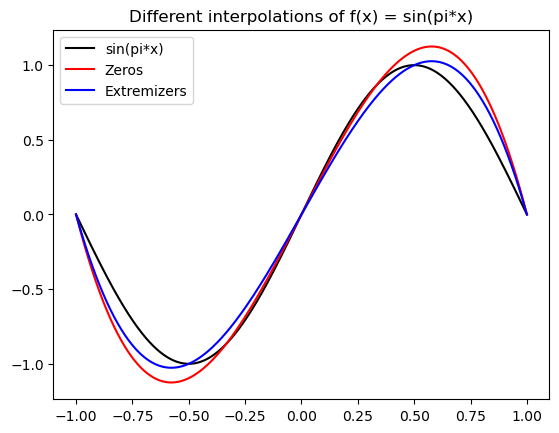

In [12]:
# Function to interpolate
f = lambda x: np.sin(np.pi * x)

# Interpolation points
prob_25_x_vals = np.array([-1, -1/3, 1/3, 1])     # Points from Problem 9.25   
prob_26_x_vals = np.array([1, 1/2, -1/2, -1])     # Points from Problem 9.26 (Chebyshev extremizers)

g = BarycentricInterpolator(prob_25_x_vals, f(prob_25_x_vals))
h = BarycentricInterpolator(prob_26_x_vals, f(prob_26_x_vals))

# plot
domain = np.linspace(-1, 1, 500)
plt.figure()
plt.plot(domain, f(domain), color='black', label='sin(pi*x)')
plt.plot(domain, g(domain), color='red', label="Zeros")
plt.plot(domain, h(domain), color='blue', label="Extremizers")
plt.legend()
plt.title("Different interpolations of f(x) = sin(pi*x)")
plt.show()


## Problem 9.28

First, write a function `cheby_zeros()` that computes the degree-n Chebyshev zeros on an arbitrary interval $[a,b]$ and returns them as a numpy array.

This should be computed using the formula you calculated in Problem 9.27.

In [13]:
def cheby_zeros(n: int, a: float = -1., b: float = 1.) -> np.ndarray:
    """Computes the degree-n Chebyshev zeros on an arbitrary
    interval [a,b].
    
    Args:
        n (int): The degree of Chebyshev zeros to compute 
        a (float): The left endpoint of the interval of interest
            (default is -1)
        b (float): The right endpoint of the interval of
            interest (default is -1)

    Returns:
        np.ndarray - A size (n,) ndarray with the n Chebyshev
            zeros of degree n.
    """
    j = np.arange(0, n, dtype=float)
    return 0.5*((b + a) + (b - a)*np.cos((np.pi/float(n))*(j + 0.5)))


Now, code up the following function `wilkinson()` that evaluates the Wilkinson polynomial at a given point x.

Recall that the Wilkionson polynomial is defined as 
$$W(x) = \prod_{j=1}^{20} (x-j) = (x-1)(x-2)\cdots(x-20)$$

In [14]:
def wilkinson(x: float) -> float:
    """Evaluates the Wilkonson polyomial W(x) at a given point x.
    
    Args:
        x (float): The input x to the function.
    
    Returns:
        float: The output W(x).
    """
    return np.prod(np.ones(20)*x - np.arange(1, 21))

Now, code up a function that evaluates the polynomial
$$q(x) = \prod_{i=1}^{20} (x - z_i')$$
at a given point $x$, where $\{z_i'\}_{i=1}^{20}$ are the $20$ Chebyshev zeros in $[1,20]$ as given by your function `cheby_zeros()` from above.

In [15]:
def q(x: float) -> float:
    """Evaluates q(x) at a given point x.
    
    Args:
        x (float): The input x to the function.
    
    Returns:
        float: The output q(x).
    """
    return np.prod(np.ones(20)*x - cheby_zeros(20, 1, 20))

Now, in the code cell below, do the following using the provided linspace `x_plot` of x-axis points:

1. Plot $q(x)$
2. Plot the Wilkinson polynomial $W(x)$ on the same axis
3. Approximate $\sup_{x \in [1,20]} q(x)$ by finding the maximal value of $q(x)$ over all the x-points in `x_plot`. Print this to the screen.
4. Approximate $\sup_{x \in [1,20]} W(x)$  by finding the maximal value of $W(x)$ over all the x-points in `x_plot`. Print this to the screen.

max q(x): 68375763398846.305
max W(x): 803535703689223.9


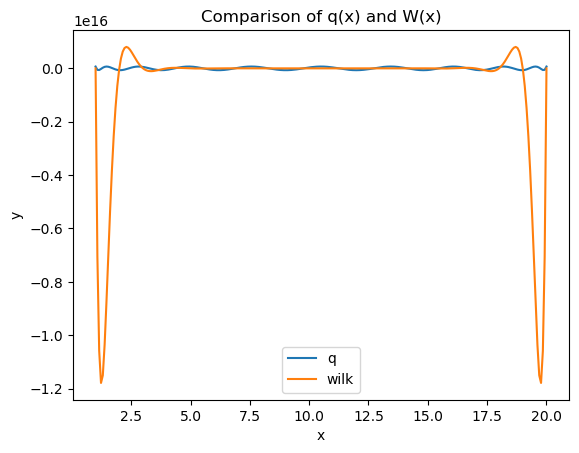

In [18]:
x_plot = np.linspace(1,20,250)      # x-points for use in plotting and analysis.

qx = []
wilk = []
for pt in x_plot:
    qx.append(q(pt))
    wilk.append(wilkinson(pt))

print(f"max q(x): {max(qx)}")
print(f"max W(x): {max(wilk)}")


plt.plot(x_plot, qx, label="q")
plt.plot(x_plot, wilk, label="wilk")
plt.title("Comparison of q(x) and W(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

---

IMPORTANT: Please "Restart and Run All" and ensure there are no errors. Then, submit this .ipynb file to Gradescope.